In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'price_speed'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称:价格速度因子(收益因子)   
因子定义: 即今日收益
$$
factor = \frac{close_t-close_{t-1}}{close_{t-1}}
$$

#### - 因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : price_speed
fields : ['close']
other_dIepend_factors : []
calc_params : {'period': 1}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [-0.89561373, 20.665707]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

- 查看因子和收益的描述性统计

In [7]:
note.factor_data_for_analysis.describe()

price_speed
count  7.100480e+06
mean   4.765443e-04
std    3.229244e-02
min   -3.687241e-01
25%   -1.400560e-02
50%    0.000000e+00
75%    1.416433e-02
max    1.975080e+01

In [8]:
note.forward_returns_for_analysis.describe()

period_1      period_2      period_3      period_5      period_8  \
count  7.102866e+06  7.102795e+06  7.102665e+06  7.102563e+06  7.102384e+06   
mean   4.655205e-04  9.950971e-04  1.508565e-03  2.542586e-03  3.997689e-03   
std    2.952431e-02  4.337566e-02  5.373137e-02  7.048313e-02  8.968203e-02   
min   -2.264042e-01 -3.653846e-01 -4.936062e-01 -6.762820e-01 -7.885572e-01   
25%   -1.400119e-02 -2.050477e-02 -2.561319e-02 -3.375000e-02 -4.251438e-02   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.417005e-02  2.120149e-02  2.665341e-02  3.523612e-02  4.497993e-02   
max    2.059352e-01  5.271149e-01  5.454545e-01  9.058099e-01  1.334786e+00   

          period_13     period_21     period_34     period_55     period_89  \
count  7.101750e+06  7.101412e+06  7.100536e+06  7.099028e+06  7.096422e+06   
mean   6.393936e-03  1.045388e-02  1.622176e-02  2.558602e-02  3.891801e-02   
std    1.153850e-01  1.498505e-01  1.922967e-01  2.487952e-01  3.173984e-01   
min   -8.368522e-01 -8.900302e-01 -9.515439e-01 -9.762490e-01 -9.837251e-01   
25%   -5.640899e-02 -7.318985e-02 -9.455217e-02 -1.180243e-01 -1.466584e-01   
50%    0.000000e+00 -2.157867e-03 -6.554008e-03 -1.231918e-02 -1.697001e-02   
75%    5.909026e-02  7.671860e-02  9.782377e-02  1.208459e-01  1.516482e-01   
max    1.859296e+00  3.206785e+00  4.121568e+00  6.429910e+00  8.022406e+00   

         period_144    period_233    period_377  
count  7.092238e+06  7.085250e+06  7.072049e+06  
mean   6.638815e-02  1.184513e-01  2.006024e-01  
std    4.196071e-01  5.860292e-01  8.145165e-01  
min   -9.820628e-01 -9.909363e-01 -9.915807e-01  
25%   -1.816903e-01 -2.240973e-01 -2.735927e-01  
50%   -1.841483e-02 -1.818180e-02 -1.536924e-02  
75%    2.021313e-01  2.802313e-01  4.077539e-01  
max    1.206763e+01  1.469536e+01  2.639132e+01

In [9]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

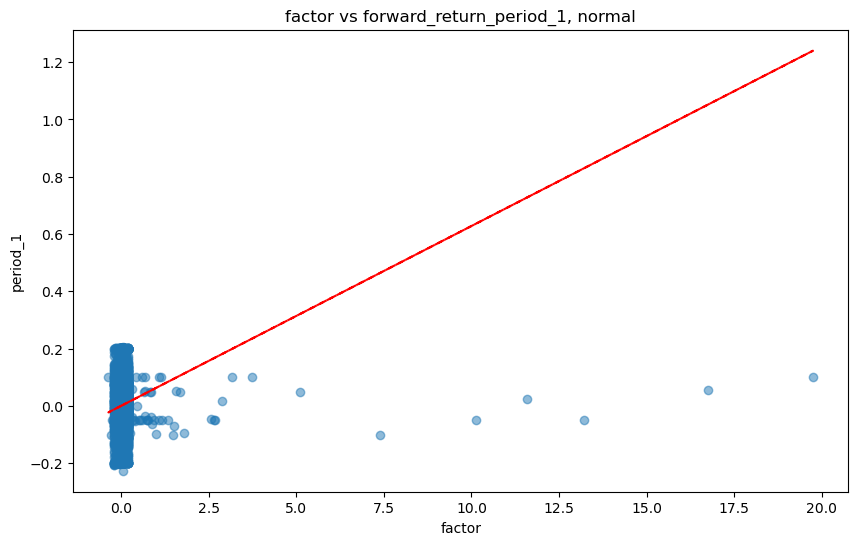

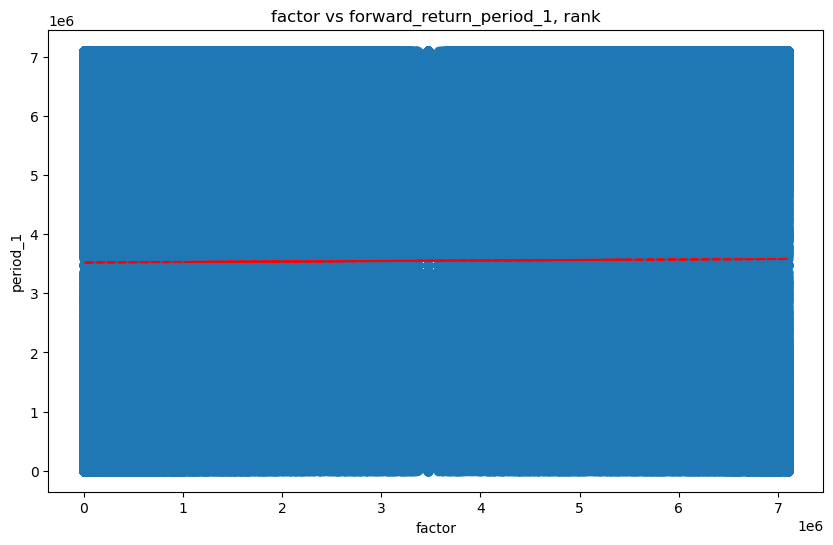

In [10]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

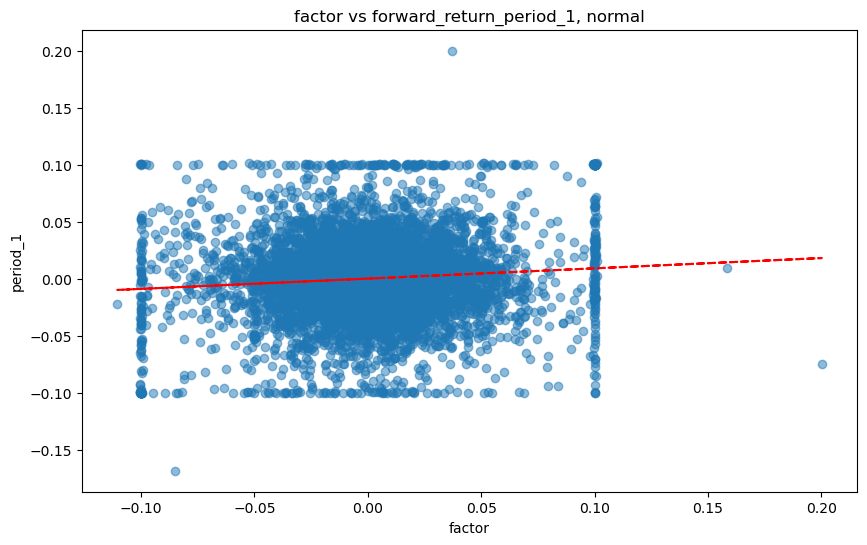

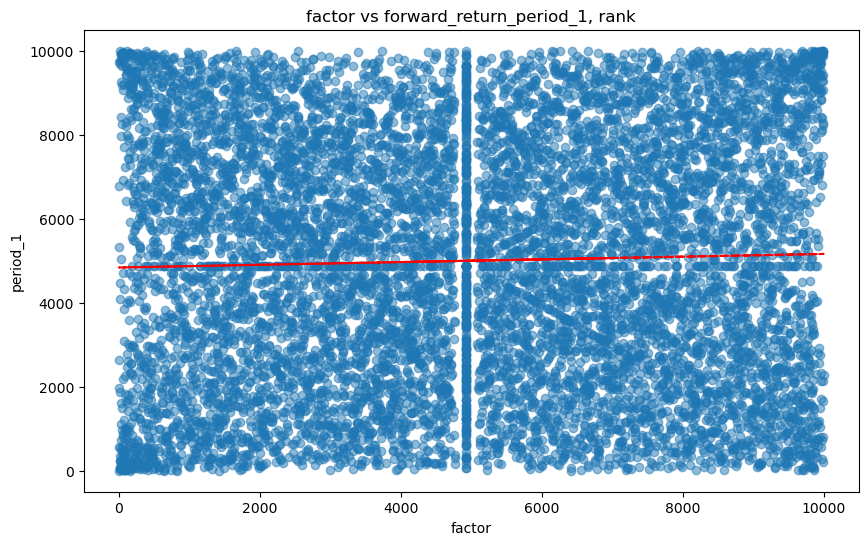

In [11]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

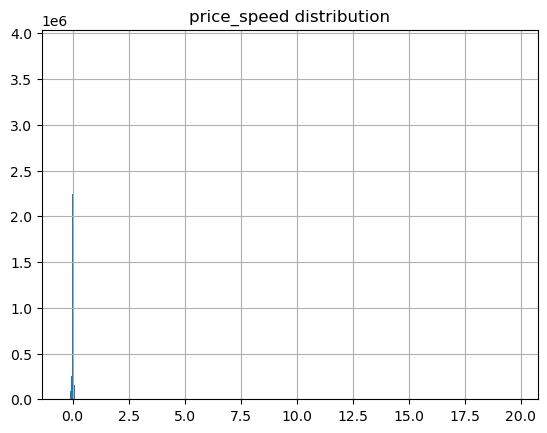

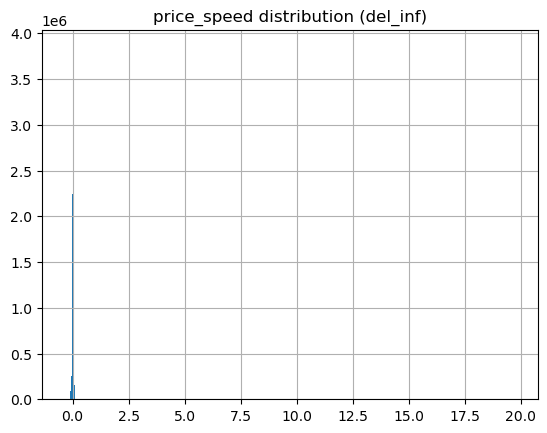

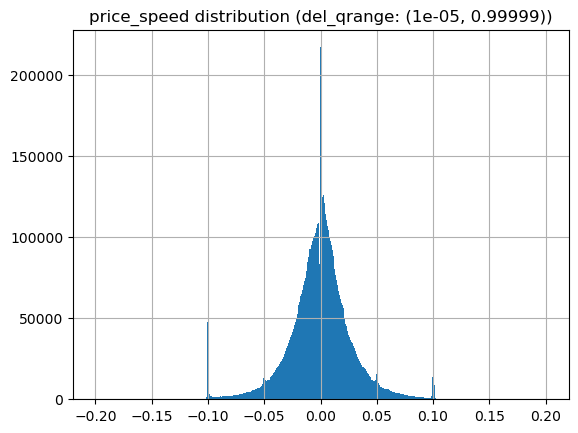

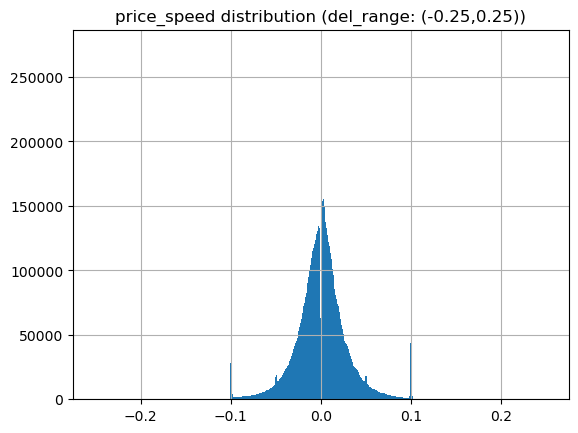

In [12]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.00001,0.99999))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-0.25,0.25))

---

#### IC

#### 打印因子ic分析结果

In [13]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
               period_1  period_2  period_3  period_5  period_8 period_13  \
norm_ic_mean  0.057973  0.037019  0.031315  0.012459  0.012853  0.008616   
norm_ic_std   0.123311  0.117563  0.114127  0.108917  0.099449  0.092775   
norm_ir       0.470136  0.314889   0.27439  0.114393  0.129242  0.092869   
norm_abs_ic   0.068718  0.043519  0.038691  0.022792  0.021724  0.016739   
rank_ic_mean -0.006534 -0.010314 -0.006527   -0.0165 -0.007957 -0.001467   
rank_ic_std   0.140834  0.131487  0.126809    0.1224  0.112482  0.108051   
rank_ir      -0.046397 -0.078443 -0.051471 -0.134807 -0.070743  -0.01358   
rank_abs_ic   0.008441  0.002333  0.009895 -0.005259 -0.002103  0.010162   

             period_21 period_34 period_55 period_89 period_144 period_233  \
norm_ic_mean  0.001549 -0.001981 -0.003276 -0.002856  -0.001282  -0.001282   
norm_ic_std   0.085714  0.080621  0.073575  0.067491   0.064376   0.061108   
norm_ir       0.018075 -0.024577 -0.044524 -0.042323  -0.019908 

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

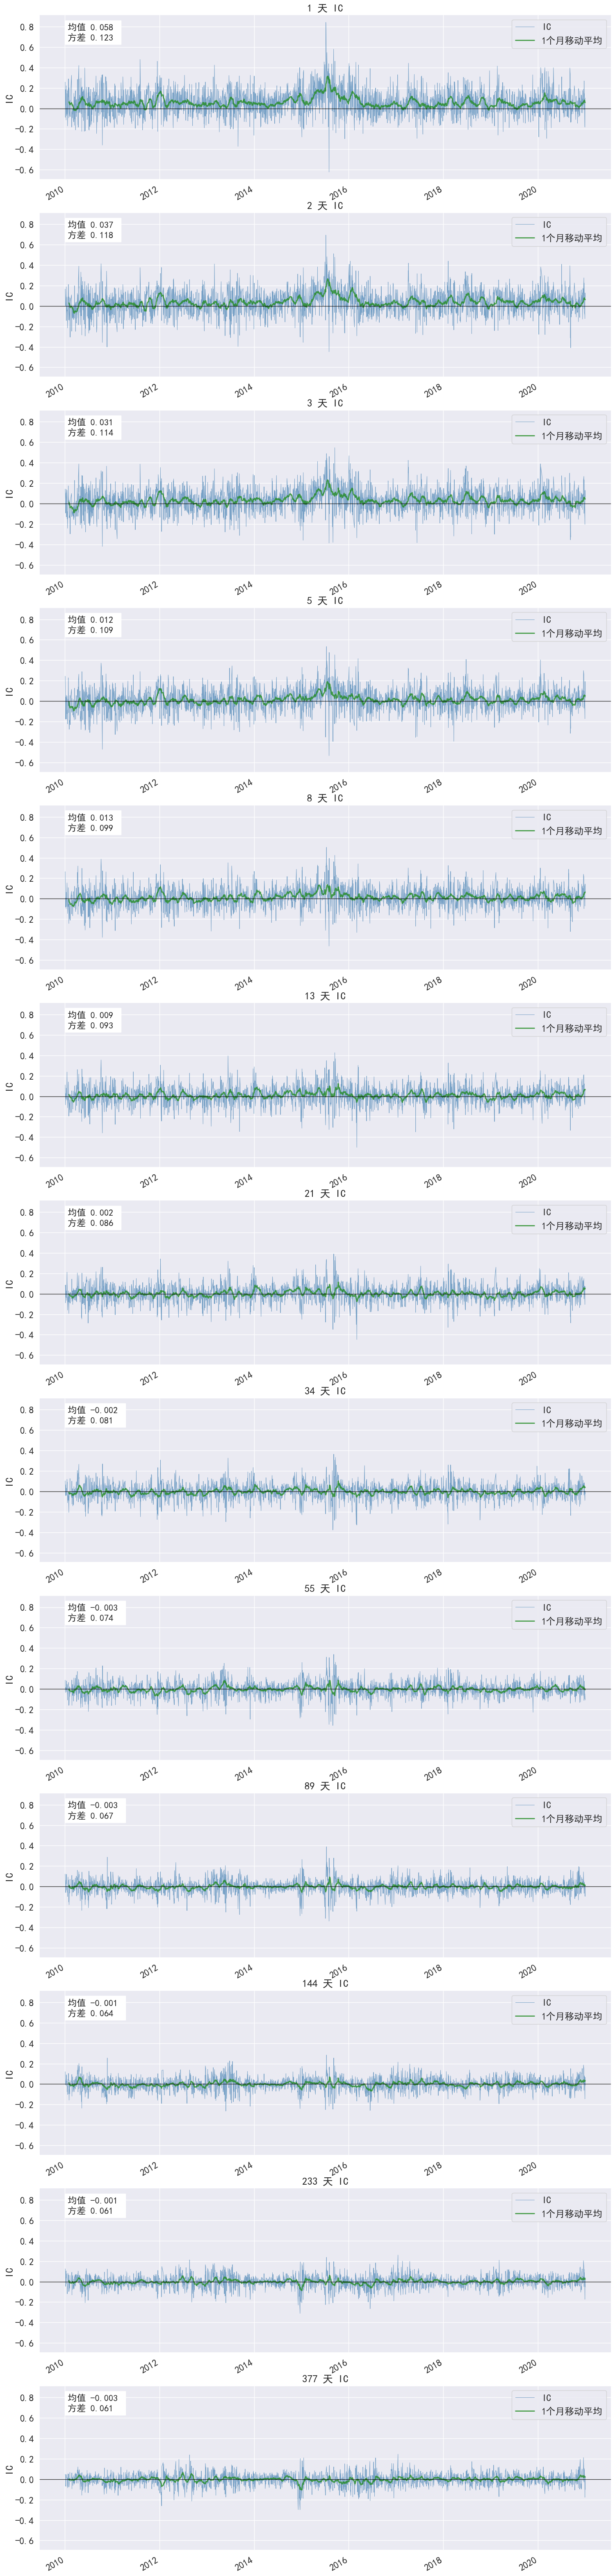

In [14]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

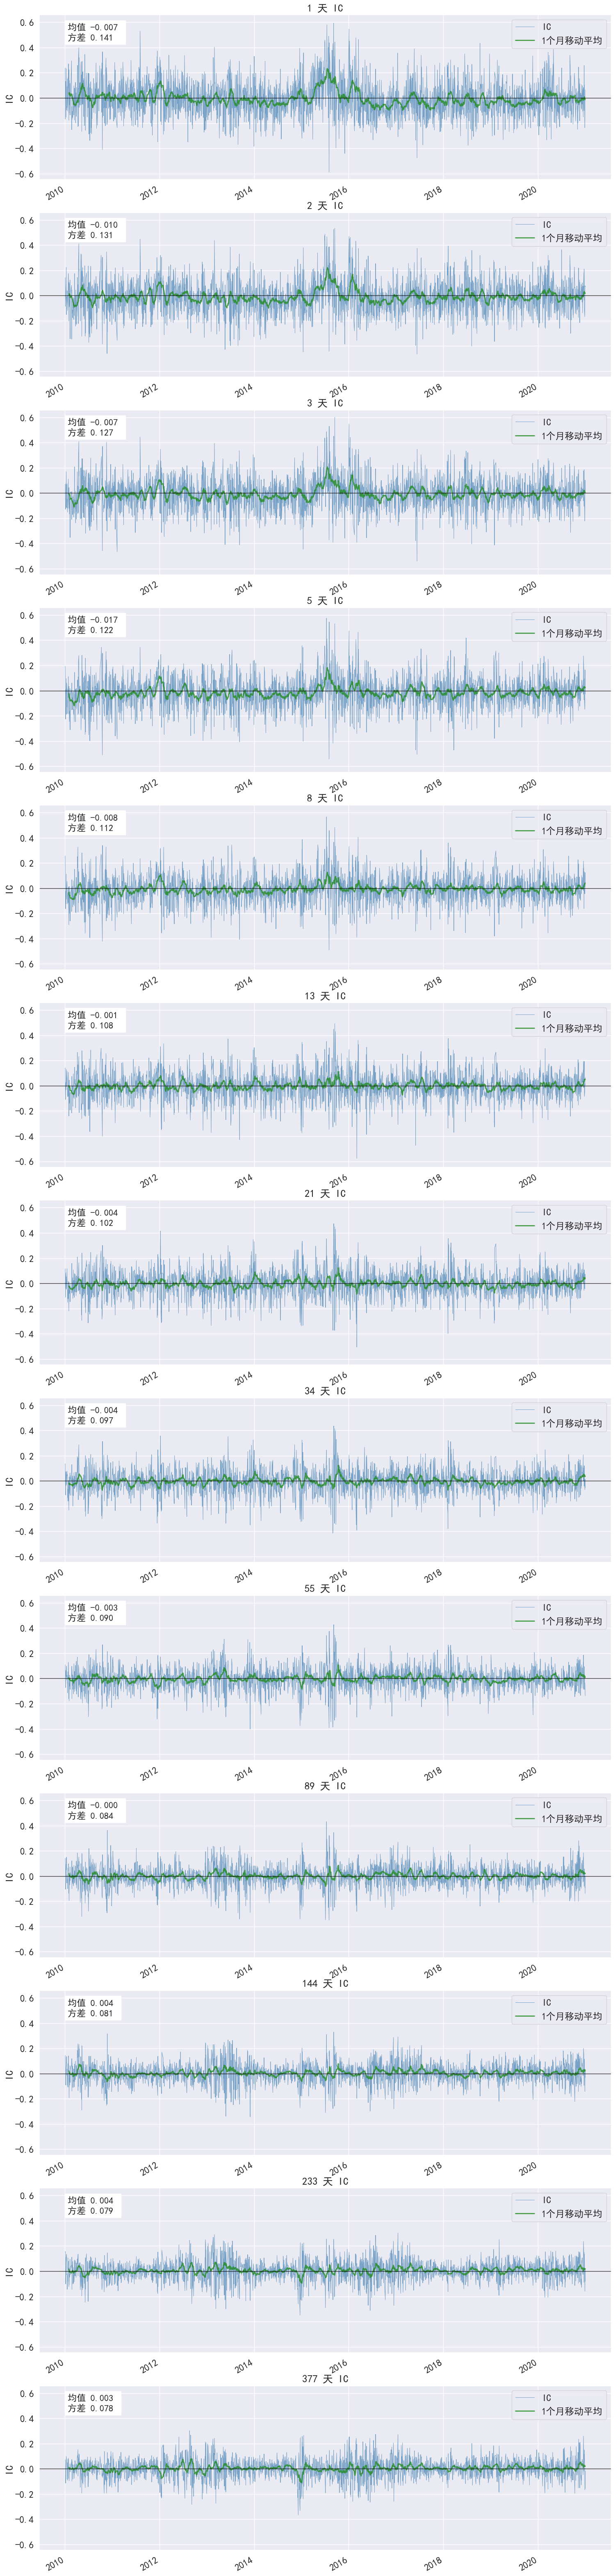

In [15]:
zy_fa.plot_rank_ic_ts()